In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot_track import plot_track
from cartesian_to_curvilinear_for_one import pose_to_curvi
import yaml
from matplotlib.widgets import Button


In [2]:

# with open('all_trajectories.yaml', 'r') as f:
#     data = yaml.load(f, Loader=yaml.FullLoader)

# df = pd.DataFrame(data)

# df.to_feather('all_trajectories.feather')

data = pd.read_feather('all_trajectories.feather')
data = data.applymap(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
# print(data)
data = data.to_dict()
    

/tmp/ipykernel_12817/3333482575.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)


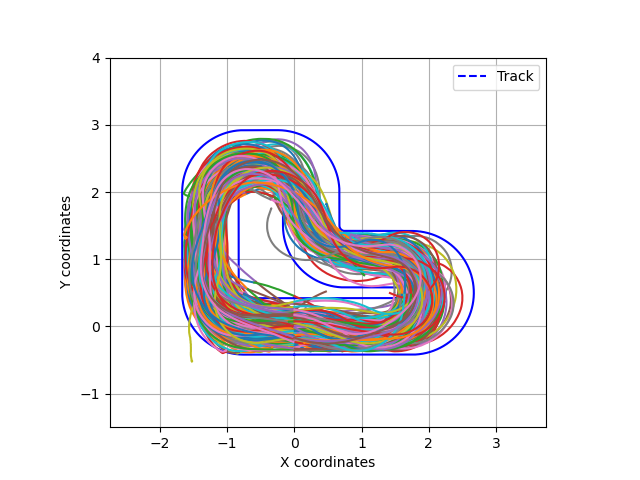

In [3]:
%matplotlib widget

data_reset = data
with open("la_track.yaml", "r") as file:
    track_shape_data = yaml.safe_load(file)

fig, ax = plt.subplots()
plot_track(fig, ax, track_shape_data)

for traj in data:
    plt.plot(data[traj]['x'], data[traj]['y'])


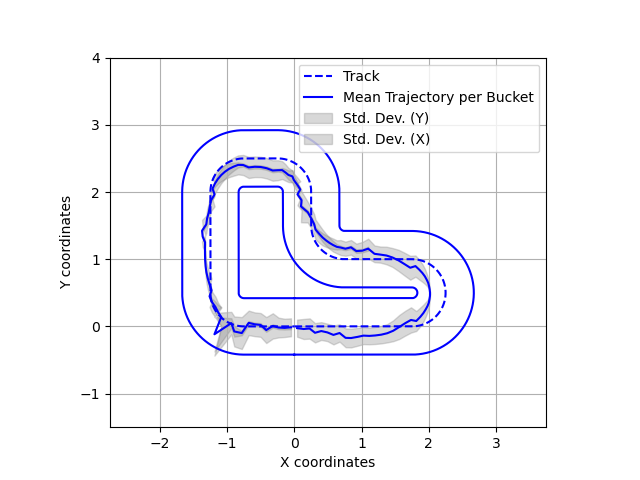

In [4]:


n_buckets = 120  # Number of buckets to divide s into (0.0-0.1, 0.1-0.2, ..., 0.9-1.0)

bucket_edges = np.linspace(0, 10.7, n_buckets + 1) # start and ends of buckets

# to concatenate the trajectories initialize the lists for all variables
all_s = []
all_x = []
all_y = []
all_e = []
all_dtheta = []
all_vx = []
all_vy = []

# concatanate all trajectories
for traj in data:
    s = np.array(data[traj]['s']) 
    x = np.array(data[traj]['x']) 
    y = np.array(data[traj]['y']) 
    dtheta = np.array(data[traj]['dtheta']) 
    vx = np.array(data[traj]['vx'])  
    vy = np.array(data[traj]['vy'])  
    e = np.array(data[traj]['e']) 

    all_s.append(s)
    all_x.append(x)
    all_y.append(y)
    all_dtheta.append(dtheta)
    all_vx.append(vx)
    all_vy.append(vy)
    all_e.append(e)

all_s = np.concatenate(all_s)
all_x = np.concatenate(all_x)
all_y = np.concatenate(all_y)
all_dtheta = np.concatenate(all_dtheta)
all_vx = np.concatenate(all_vx)
all_vy = np.concatenate(all_vy)
all_e = np.concatenate(all_e)

# sort all of them

sorted_indices = np.argsort(all_s)
s_sorted = all_s[sorted_indices]
x_sorted = all_x[sorted_indices]
y_sorted = all_y[sorted_indices]
dtheta_sorted = all_dtheta[sorted_indices]
vx_sorted = all_vx[sorted_indices]
vy_sorted = all_vy[sorted_indices]
e_sorted = all_e[sorted_indices]

# init means and std lists for all buckets
mean_x_per_bucket = []
mean_y_per_bucket = []
std_x_per_bucket = []
std_y_per_bucket = []
mean_e_per_bucket = []
std_e_per_bucket = []
mean_dtheta_per_bucket = []
std_dtheta_per_bucket = []
mean_vx_per_bucket = []
std_vx_per_bucket = []
mean_vy_per_bucket = []
std_vy_per_bucket = []
bucket_centers = []

# add the means and stds of individual buckets to lists
for i in range(n_buckets):
    bucket_start = bucket_edges[i]
    bucket_end = bucket_edges[i + 1]

    in_bucket = (s_sorted >= bucket_start) & (s_sorted < bucket_end)

    bucket_x = x_sorted[in_bucket]
    bucket_y = y_sorted[in_bucket]
    bucket_dtheta = dtheta_sorted[in_bucket]
    bucket_vx = vx_sorted[in_bucket]
    bucket_vy = vy_sorted[in_bucket]
    bucket_e = e_sorted[in_bucket]

    if len(bucket_x) > 0: 
        mean_x = np.mean(bucket_x)
        mean_y = np.mean(bucket_y)
        std_x = np.std(bucket_x)
        std_y = np.std(bucket_y)
        mean_dtheta = np.mean(bucket_dtheta)
        std_dtheta = np.std(bucket_dtheta)
        mean_vx = np.mean(bucket_vx)
        std_vx = np.std(bucket_vx)
        mean_vy = np.mean(bucket_vy)
        std_vy = np.std(bucket_vy)
        mean_e = np.mean(bucket_e)
        std_e = np.mean(bucket_e)

        mean_x_per_bucket.append(mean_x)
        mean_y_per_bucket.append(mean_y)
        std_x_per_bucket.append(std_x)
        std_y_per_bucket.append(std_y)
        mean_dtheta_per_bucket.append(mean_dtheta)
        std_dtheta_per_bucket.append(std_dtheta)
        mean_vx_per_bucket.append(mean_vx)
        std_vx_per_bucket.append(std_vx)
        mean_vy_per_bucket.append(mean_vy)
        std_vy_per_bucket.append(std_vy)
        mean_e_per_bucket.append(mean_e)
        std_e_per_bucket.append(std_e)
        bucket_centers.append((bucket_start + bucket_end) / 2)

mean_x_per_bucket = np.array(mean_x_per_bucket)
mean_y_per_bucket = np.array(mean_y_per_bucket)
std_x_per_bucket = np.array(std_x_per_bucket)
std_y_per_bucket = np.array(std_y_per_bucket)
mean_dtheta_per_bucket = np.array(mean_dtheta_per_bucket)
std_dtheta_per_bucket = np.array(std_dtheta_per_bucket)
mean_vx_per_bucket = np.array(mean_vx_per_bucket)
std_vx_per_bucket = np.array(std_vx_per_bucket)
mean_vy_per_bucket = np.array(mean_vy_per_bucket)
std_vy_per_bucket = np.array(std_vy_per_bucket)
mean_e_per_bucket = np.array(mean_e_per_bucket)
std_e_per_bucket = np.array(std_e_per_bucket)
bucket_centers = np.array(bucket_centers)


# plot them
fig, ax = plt.subplots()
plot_track(fig, ax, track_shape_data)

ax.plot(mean_x_per_bucket, mean_y_per_bucket, color='blue', label='Mean Trajectory per Bucket')

ax.fill_between(mean_x_per_bucket, 
                mean_y_per_bucket - std_y_per_bucket, 
                mean_y_per_bucket + std_y_per_bucket, 
                color='gray', alpha=0.3, label='Std. Dev. (Y)')

ax.fill_between(mean_x_per_bucket, 
                mean_y_per_bucket - std_x_per_bucket, 
                mean_y_per_bucket + std_x_per_bucket, 
                color='gray', alpha=0.3, label='Std. Dev. (X)', where=mean_x_per_bucket < mean_y_per_bucket)
ax.legend()
plt.show()

# create the dataframes
bucket_data = pd.DataFrame({
    's': bucket_centers,
    'mean_x': mean_x_per_bucket,
    'mean_y': mean_y_per_bucket,
    'std_x': std_x_per_bucket,
    'std_y': std_y_per_bucket,
    'mean_dtheta': mean_dtheta_per_bucket,
    'std_dtheta': std_dtheta_per_bucket,
    'mean_vx': mean_vx_per_bucket,
    'std_vx': std_vx_per_bucket,
    'mean_vy': mean_vy_per_bucket,
    'std_vy': std_vy_per_bucket,
    "mean_e": mean_e_per_bucket,
    "std_e":std_e_per_bucket
})


mean_traj = {
    's': bucket_centers,
    'x': mean_x_per_bucket,
    'y': mean_y_per_bucket,
    'dtheta': mean_dtheta_per_bucket,
    'vx': mean_vx_per_bucket,
    'vy': mean_vy_per_bucket,
    'e': mean_e_per_bucket
}

outer_traj = {
    's': bucket_centers,
    'x': mean_x_per_bucket + std_x_per_bucket,
    'y': mean_y_per_bucket + std_y_per_bucket,
    'dtheta': mean_dtheta_per_bucket + std_dtheta_per_bucket,
    'vx': mean_vx_per_bucket + std_vx_per_bucket,
    'vy': mean_vy_per_bucket + std_vy_per_bucket,
    'e': mean_e_per_bucket + std_e_per_bucket
}

inner_traj = {
    's': bucket_centers,
    'x': mean_x_per_bucket - std_x_per_bucket,
    'y': mean_y_per_bucket - std_y_per_bucket,
    'dtheta': mean_dtheta_per_bucket - std_dtheta_per_bucket,
    'vx': mean_vx_per_bucket - std_vx_per_bucket,
    'vy': mean_vy_per_bucket - std_vy_per_bucket,
    'e': mean_e_per_bucket - std_e_per_bucket
}




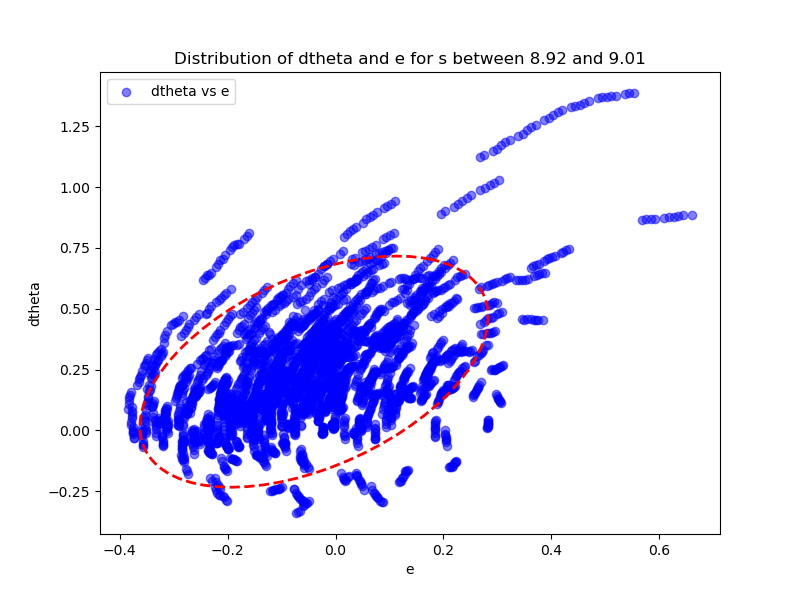

In [5]:
from matplotlib.patches import Ellipse

%matplotlib widget


# plot random buckets and their corresponding confidence ellipsoids

random_bucket_index = np.random.choice(len(bucket_centers))

bucket_start = bucket_edges[random_bucket_index]
bucket_end = bucket_edges[random_bucket_index + 1]

in_bucket = (s_sorted >= bucket_start) & (s_sorted < bucket_end)
bucket_dtheta = dtheta_sorted[in_bucket]
bucket_e = e_sorted[in_bucket]

cov_matrix = np.cov(bucket_e, bucket_dtheta)
eigvals, eigvecs = np.linalg.eig(cov_matrix)
stds = np.sqrt(eigvals)

# Eigenvector direction gives the angle of the ellipse. We need to compute the angle from the eigenvector.
angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi

ellipse = Ellipse(xy=(np.mean(bucket_e), np.mean(bucket_dtheta)), 
                  width=4*stds[0],  
                  height=4*stds[1],
                  angle=angle,  
                  edgecolor='red',
                  facecolor='none',
                  linestyle='--',
                  linewidth=2)

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(bucket_e, bucket_dtheta, color='blue', alpha=0.5, label='dtheta vs e')
ax.add_patch(ellipse)

ax.set_xlabel('e')
ax.set_ylabel('dtheta')
ax.set_title(f'Distribution of dtheta and e for s between {bucket_start:.2f} and {bucket_end:.2f}')
ax.legend()

plt.show()


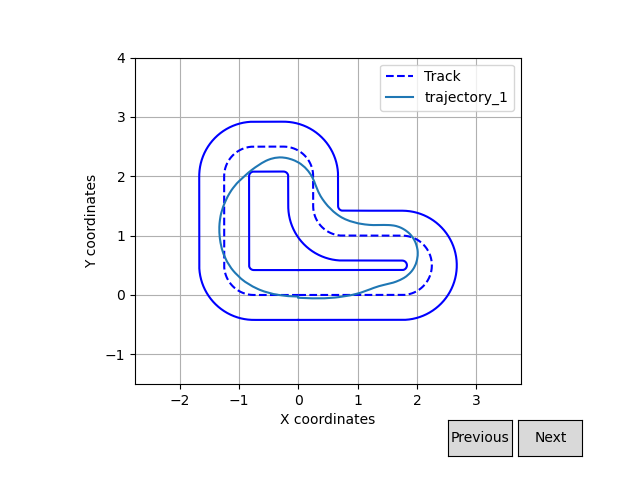

In [6]:
%matplotlib widget

# plot all trajectories one by one

data = data_reset

filtered_data = {key: value for key, value in data.items() if 's' in value and len(value['s']) > 1000}

def update_trajectory(label):
    ax.clear()
    plot_track(fig, ax, track_shape_data)
    if label in filtered_data:
        ax.plot(filtered_data[label]['x'], filtered_data[label]['y'], label=label)
    ax.legend()
    plt.draw()

class Index:
    def __init__(self, traj_labels):
        self.idx = 0
        self.traj_labels = traj_labels

    def next(self, event):
        self.idx = (self.idx + 1) % len(self.traj_labels)
        update_trajectory(self.traj_labels[self.idx])

    def prev(self, event):
        self.idx = (self.idx - 1) % len(self.traj_labels)
        update_trajectory(self.traj_labels[self.idx])


fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

plot_track(fig, ax, track_shape_data)

initial_traj = list(filtered_data.keys())[0]
ax.plot(filtered_data[initial_traj]['x'], filtered_data[initial_traj]['y'], label=initial_traj)
ax.legend()

axprev = plt.axes([0.7, 0.05, 0.1, 0.075]) 
axnext = plt.axes([0.81, 0.05, 0.1, 0.075]) 

traj_labels = list(filtered_data.keys())
callback = Index(traj_labels)
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

# Show the plot
plt.show()

In [7]:
import yaml
import numpy as np

data = data_reset

# create added data in the same format as the filtered data and same type but all empty inside added_data
added_data = {key: {key: [] for key in value} for key, value in filtered_data.items()}

filtered_data = {key: value for key, value in data.items() if 's' in value and len(value['s']) > 1000}

def is_outside_ellipsoid(noisy_e, noisy_dtheta, mean_e, mean_dtheta, std_e, std_dtheta, angle):
    # Rotate the point to the ellipsoid's coordinate system
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)

    # Rotate the point (noisy_e, noisy_dtheta) into the ellipsoid's frame
    rotated_e = cos_angle * (noisy_e - mean_e) + sin_angle * (noisy_dtheta - mean_dtheta)
    rotated_dtheta = -sin_angle * (noisy_e - mean_e) + cos_angle * (noisy_dtheta - mean_dtheta)

    # Check if the rotated point is outside the ellipsoid (we are using 4*std to get the ellipse's bounds)
    dist = (rotated_e / (4 * std_e)) ** 2 + (rotated_dtheta / (4 * std_dtheta)) ** 2
    return dist > 1

def numpy_to_native(value):
    if isinstance(value, np.ndarray):
        return value.tolist()  
    elif isinstance(value, np.generic):
        return value.item()
    return value

def add_noise(x, y, heading_angle, pos_std=0.1, theta_std=0.05):
    noisy_x = x + np.random.normal(0, pos_std)
    noisy_y = y + np.random.normal(0, pos_std)
    noisy_heading = heading_angle + np.random.normal(0, theta_std)
    return float(noisy_x), float(noisy_y), float(noisy_heading)

def compute_target_point(x, y, trajectory, deltaS, s):

    try:
        x_traj = np.array(trajectory['x'])
        y_traj = np.array(trajectory['y'])
        s_traj = np.array(trajectory['s'])
    except KeyError:
        x_traj = np.array(trajectory['xCoords'])
        y_traj = np.array(trajectory['yCoords'])
        s_traj = np.array(trajectory['arcLength'])

    distances = np.sqrt((x_traj - x)**2 + (y_traj - y)**2)

    direction_vectors = np.array([x_traj- x, y_traj - y]).T
    
    forward_indices = [
        i for i in range(len(direction_vectors))
        if s_traj[i] > s + deltaS
    ]

    if not forward_indices:
        target_idx = np.argmin(distances)
        return x_traj[target_idx], y_traj[target_idx]

    if not forward_indices:
        target_idx = forward_indices[-1]
        return x_traj[target_idx], y_traj[target_idx]

    target_idx = forward_indices[0]
    return x_traj[target_idx], y_traj[target_idx]


def pure_pursuit_controller(x, y, heading_angle, trajectory, deltaS, s):

    target_x, target_y = compute_target_point(x, y, trajectory, deltaS, s)

    dx = target_x - x
    dy = target_y - y
    target_angle = np.arctan2(dy, dx)

    heading_error = target_angle - heading_angle
   
    if heading_error > np.pi:
        heading_error -= 2 * np.pi
    else:
        if heading_error < -np.pi:
            heading_error += 2 * np.pi
    
    wheelbase = 0.098

    lookahead_distance = np.sqrt(dx**2 + dy**2)
    
    steering_angle = np.arctan2(2.0 * wheelbase * np.sin(heading_error), lookahead_distance)
    
    return steering_angle, target_x, target_y

Kdd = 0.30
new_trajectories = []

with open("la_track.yaml", "r") as file:
    track_shape_data = yaml.safe_load(file)
 
track_shape_data['track']['xCoords'] = np.array(track_shape_data['track']['xCoords']) - track_shape_data['track']['x_init']
track_shape_data['track']['yCoords'] = np.array(track_shape_data['track']['yCoords']) - track_shape_data['track']['y_init']

i = 0
use_ellipsoids = False

for traj_key, trajectory in filtered_data.items():
    noisy_trajectory = []
    
    for i in range(1, len(trajectory['s']), 5):
        if i >= len(trajectory['x']):
            break

        x = trajectory['x'][i]
        y = trajectory['y'][i]
        heading_angle = trajectory['heading_angle'][i]
        v = np.sqrt(trajectory['vx'][i] ** 2 + trajectory['vy'][i] ** 2)
        
        noisy_x, noisy_y, noisy_heading_angle = add_noise(x, y, heading_angle, pos_std=0.7, theta_std=2.0)
        
        noisy_s, noisy_e, noisy_dtheta = pose_to_curvi(track_shape_data, np.array([noisy_x, noisy_y, noisy_heading_angle]), bring_to_origin=False)
        
        deltaS = v * Kdd    
        
        bucket_index = np.digitize(noisy_s, bucket_edges) - 1
        if bucket_index >= len(bucket_centers): 
            bucket_index = len(bucket_centers) - 1
        
        mean_e = mean_e_per_bucket[bucket_index]
        mean_dtheta = mean_dtheta_per_bucket[bucket_index]
        std_e = std_e_per_bucket[bucket_index]
        std_dtheta = std_dtheta_per_bucket[bucket_index]

        bucket_start = bucket_edges[bucket_index]
        bucket_end = bucket_edges[bucket_index + 1]

        in_bucket = (s_sorted >= bucket_start) & (s_sorted < bucket_end)
        bucket_dtheta = dtheta_sorted[in_bucket]
        bucket_e = e_sorted[in_bucket]

        cov_matrix = np.cov(bucket_e, bucket_dtheta)
        eigvals, eigvecs = np.linalg.eig(cov_matrix)
        stds = np.sqrt(eigvals)

        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi
        
        if use_ellipsoids:
            if is_outside_ellipsoid(noisy_e, noisy_dtheta, mean_e, std_e, mean_dtheta, std_dtheta, angle):
                # steering_angle, _, _ = pure_pursuit_controller(noisy_x, noisy_y, noisy_heading_angle, track_shape_data['track'], deltaS, noisy_s)
                steering_angle, _, _ = pure_pursuit_controller(noisy_x, noisy_y, noisy_heading_angle, mean_traj, deltaS, noisy_s)
                # steering_angle, _, _ = pure_pursuit_controller(noisy_x, noisy_y, noisy_heading_angle, outer_traj, deltaS, noisy_s)
            else:
                continue
        else:
            steering_angle, _, _ = pure_pursuit_controller(noisy_x, noisy_y, noisy_heading_angle, mean_traj, deltaS, s=noisy_s)

        # Normalize the steering angle and update the data
        steering = np.clip(steering_angle / np.deg2rad(17), -1, 1)

        # Convert values to native Python types for serialization
        noisy_s = numpy_to_native(noisy_s)
        noisy_e = numpy_to_native(noisy_e)
        noisy_dtheta = numpy_to_native(noisy_dtheta)
        steering_angle = numpy_to_native(steering_angle)
        noisy_x = numpy_to_native(noisy_x)
        noisy_y = numpy_to_native(noisy_y)
        noisy_heading_angle = numpy_to_native(noisy_heading_angle)
        steering = numpy_to_native(steering)

        # Append the new noisy data to both filtered and added data
        filtered_data[traj_key]['s'].append(noisy_s)
        filtered_data[traj_key]['e'].append(noisy_e)
        filtered_data[traj_key]['dtheta'].append(noisy_dtheta)
        filtered_data[traj_key]['vx'].append(data[traj_key]['vx'][i])
        filtered_data[traj_key]['vy'].append(data[traj_key]['vy'][i])
        filtered_data[traj_key]['omega'].append(data[traj_key]['omega'][i])
        filtered_data[traj_key]['steering'].append(steering)
        filtered_data[traj_key]['throttle'].append(data[traj_key]['throttle'][i])
        filtered_data[traj_key]['x'].append(noisy_x)
        filtered_data[traj_key]['y'].append(noisy_y)
        filtered_data[traj_key]['heading_angle'].append(noisy_heading_angle)

        added_data[traj_key]['s'].append(noisy_s)
        added_data[traj_key]['e'].append(noisy_e)
        added_data[traj_key]['dtheta'].append(noisy_dtheta)
        added_data[traj_key]['vx'].append(data[traj_key]['vx'][i])
        added_data[traj_key]['vy'].append(data[traj_key]['vy'][i])
        added_data[traj_key]['omega'].append(data[traj_key]['omega'][i])
        added_data[traj_key]['steering'].append(steering)
        added_data[traj_key]['throttle'].append(data[traj_key]['throttle'][i])
        added_data[traj_key]['x'].append(noisy_x)
        added_data[traj_key]['y'].append(noisy_y)
        added_data[traj_key]['heading_angle'].append(noisy_heading_angle)

        




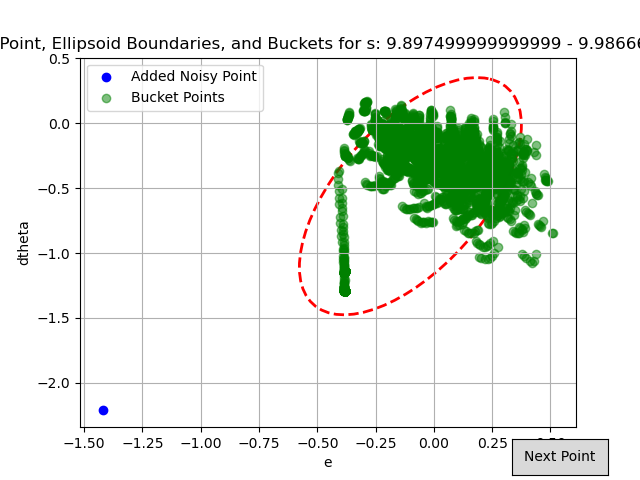

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
from matplotlib.patches import Ellipse

class InteractivePointPlot:
    def __init__(self, filtered_data, added_data, bucket_edges, bucket_centers, mean_e_per_bucket, mean_dtheta_per_bucket, std_e_per_bucket, std_dtheta_per_bucket, e_sorted, dtheta_sorted, s_sorted):
        self.filtered_data = filtered_data
        self.added_data = added_data
        self.bucket_edges = bucket_edges
        self.bucket_centers = bucket_centers
        self.mean_e_per_bucket = mean_e_per_bucket
        self.mean_dtheta_per_bucket = mean_dtheta_per_bucket
        self.std_e_per_bucket = std_e_per_bucket
        self.std_dtheta_per_bucket = std_dtheta_per_bucket
        self.e_sorted = e_sorted
        self.dtheta_sorted = dtheta_sorted
        self.s_sorted = s_sorted

        self.current_trajectory_idx = 0  # Start from the first trajectory
        self.current_point_idx = 0  # Start from the first point in the trajectory

        # Get the list of all trajectory keys
        self.traj_keys = list(self.added_data.keys())
        
        # Create the figure and axis
        self.fig, self.ax = plt.subplots()
        self.ax.set_title("Noisy Data Points, Ellipsoid Boundaries, and Buckets")
        self.ax.set_xlabel("Error (e)")
        self.ax.set_ylabel("Change in Heading (dtheta)")
        self.ax.grid(True)

        # Add a button to move to the next point
        self.ax_button = plt.axes([0.8, 0.01, 0.15, 0.075])  # position of button
        self.button = Button(self.ax_button, "Next Point")
        self.button.on_clicked(self.next_point)

        # Initial plot for the first point
        self.plot_next_point()

    def plot_bucket(self, mean_e, mean_dtheta, std_e, std_dtheta):
        # Draw a rectangle representing the bucket range
        self.ax.plot([mean_e - 2 * std_e, mean_e + 2 * std_e], [mean_dtheta, mean_dtheta], color='black', linestyle='-', linewidth=1)
        self.ax.plot([mean_e, mean_e], [mean_dtheta - 2 * std_dtheta, mean_dtheta + 2 * std_dtheta], color='black', linestyle='-', linewidth=1)

    def plot_added_point(self, noisy_e, noisy_dtheta, mean_e, mean_dtheta, std_e, std_dtheta, angle, bucket_e, bucket_dtheta):
        # Plot the noisy points
        self.ax.scatter(noisy_e, noisy_dtheta, color='blue', label='Added Noisy Point')

        # Plot the bucket distribution (scatter the points within the bucket)
        self.ax.scatter(bucket_e, bucket_dtheta, color='green', label='Bucket Points', alpha=0.5)

    def plot_next_point(self):
        # Clear the previous plot
        self.ax.clear()

        # Plot the title and labels again
        self.ax.set_xlabel("e")
        self.ax.set_ylabel("dtheta")
        self.ax.grid(True)

        # Get the current trajectory and point
        traj_key = self.traj_keys[self.current_trajectory_idx]
        trajectory = self.added_data[traj_key]

        # Get the current noisy data point
        noisy_e = trajectory['e'][self.current_point_idx]
        noisy_dtheta = trajectory['dtheta'][self.current_point_idx]

        # Get the corresponding bucket statistics
        s_value = trajectory['s'][self.current_point_idx]
        bucket_index = np.digitize(s_value, self.bucket_edges) - 1
        if bucket_index >= len(self.bucket_centers):
            bucket_index = len(self.bucket_centers) - 1

        mean_e = self.mean_e_per_bucket[bucket_index]
        mean_dtheta = self.mean_dtheta_per_bucket[bucket_index]
        std_e = self.std_e_per_bucket[bucket_index]
        std_dtheta = self.std_dtheta_per_bucket[bucket_index]

        # Find which points are in the current bucket
        bucket_start = self.bucket_edges[bucket_index]
        bucket_end = self.bucket_edges[bucket_index + 1]
        in_bucket = (self.s_sorted >= bucket_start) & (self.s_sorted < bucket_end)
        bucket_dtheta = self.dtheta_sorted[in_bucket]
        bucket_e = self.e_sorted[in_bucket]

        # Compute the covariance and angle for the ellipsoid
        cov_matrix = np.cov(bucket_e, bucket_dtheta)
        eigvals, eigvecs = np.linalg.eig(cov_matrix)

        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0]) * 180 / np.pi
        stds = np.sqrt(eigvals)

        # Draw the ellipsoid representing the covariance
        ellipse = Ellipse(xy=(np.mean(bucket_e), np.mean(bucket_dtheta)), 
                        width=4*stds[0],  
                        height=4*stds[1],
                        angle=angle,  
                        edgecolor='red',
                        facecolor='none',
                        linestyle='--',
                        linewidth=2)
        self.ax.add_patch(ellipse)

        # Plot the noisy data point and the corresponding bucket and ellipsoid
        self.plot_added_point(noisy_e, noisy_dtheta, mean_e, mean_dtheta, std_e, std_dtheta, angle, bucket_e, bucket_dtheta)
        self.ax.set_title(f"Noisy Data Point, Ellipsoid Boundaries, and Buckets for s: {bucket_start} - {bucket_end}")

        # Update the legend
        self.ax.legend(loc='best')

        # Redraw the plot
        self.fig.canvas.draw()

    def next_point(self, event):
        # Increment the point index for the current trajectory
        self.current_point_idx += 1

        # If we are at the last point of the current trajectory, move to the next trajectory
        if self.current_point_idx >= len(self.added_data[self.traj_keys[self.current_trajectory_idx]]['e']):
            self.current_point_idx = 0  # Reset to the first point of the current trajectory
            self.current_trajectory_idx += 1  # Move to the next trajectory

        # If we are at the last trajectory, loop back to the first trajectory
        if self.current_trajectory_idx >= len(self.traj_keys):
            self.current_trajectory_idx = 0

        # Plot the next point
        self.plot_next_point()

# Assuming the variables `filtered_data`, `added_data`, `bucket_edges`, etc. are defined
# Create the interactive plot instance
interactive_point_plot = InteractivePointPlot(
    filtered_data, added_data, bucket_edges, bucket_centers, mean_e_per_bucket, mean_dtheta_per_bucket, std_e_per_bucket, std_dtheta_per_bucket, e_sorted, dtheta_sorted, s_sorted
)

plt.show()


In [9]:


def convert_numpy_types(data):
    """
    Recursively traverses the data structure and:
    - Converts any NumPy scalars (e.g., np.float64, np.int32) to native Python types.
    - Converts any NumPy arrays to Python lists.
    """
    if isinstance(data, dict):
        for key, value in data.items():
            data[key] = convert_numpy_types(value)  
    elif isinstance(data, list):
        for i, item in enumerate(data):
            data[i] = convert_numpy_types(item)
    elif isinstance(data, np.ndarray):  
        return data.tolist()
    elif isinstance(data, np.generic): 
        return data.item()  
    else:
        return data
    
    return data  

def check_numpy_types(data):
    if isinstance(data, dict):
        for key, value in data.items():
            check_numpy_types(value)  
    elif isinstance(data, list):
        for item in data:
            check_numpy_types(item)  
    elif isinstance(data, np.ndarray):
        print(f"Found NumPy array: {data}")
    elif isinstance(data, np.generic):
        print(f"Found NumPy scalar: {data}")
    else:
        pass

convert_numpy_types(filtered_data)
check_numpy_types(filtered_data)

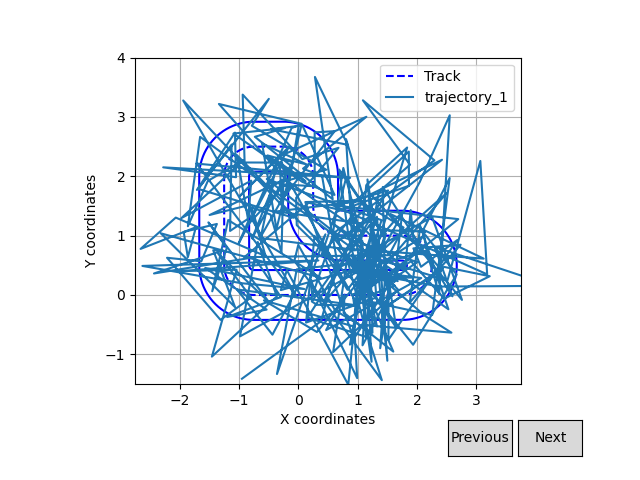

In [10]:
%matplotlib widget

def update_trajectory(label):
    ax.clear()
    plot_track(fig, ax, track_shape_data)
    i = 0
    if label in filtered_data:
        # Plot the individual points without connecting them
        ax.scatter(added_data[label]['x'], added_data[label]['y'], label=label, color='b')
        
        # Add arrows to indicate the steering angle
        for i in range(len(added_data[label]['x'])):
            x = added_data[label]['x'][i]
            y = added_data[label]['y'][i]
            heading_angle = added_data[label]['heading_angle'][i]
            steering_angle = added_data[label]['steering'][i]

            # Determine the direction of the arrow based on heading angle and steering angle
            arrow_length = 0.3  # You can adjust this to make arrows bigger/smaller
            dx = arrow_length * np.cos(heading_angle)
            dy = arrow_length * np.sin(heading_angle)

            dx_steer = arrow_length * np.cos(heading_angle + steering_angle)
            dy_steer = arrow_length * np.sin(heading_angle + steering_angle)

            
            # Draw an arrow for the steering angle
            if i == 0:
                ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='r', alpha=0.6, label='Heading')
                ax.quiver(x, y, dx_steer, dy_steer, angles='xy', scale_units='xy', scale=1, color='g', alpha=0.6, label='Steering')
            else:
                ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='r', alpha=0.6)
                ax.quiver(x, y, dx_steer, dy_steer, angles='xy', scale_units='xy', scale=1, color='g', alpha=0.6)
                
            i += 1
        

    ax.legend()
    plt.draw()
class Index:
    def __init__(self, traj_labels):
        self.idx = 0
        self.traj_labels = traj_labels

    def next(self, event):
        self.idx = (self.idx + 1) % len(self.traj_labels)
        update_trajectory(self.traj_labels[self.idx])

    def prev(self, event):
        self.idx = (self.idx - 1) % len(self.traj_labels)
        update_trajectory(self.traj_labels[self.idx])

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

track_shape_data['track']['xCoords'] = np.array(track_shape_data['track']['xCoords']) + track_shape_data['track']['x_init']
track_shape_data['track']['yCoords'] = np.array(track_shape_data['track']['yCoords']) + track_shape_data['track']['y_init']

plot_track(fig, ax, track_shape_data)

initial_traj = list(filtered_data.keys())[0]
ax.plot(added_data[initial_traj]['x'], added_data[initial_traj]['y'], label=initial_traj)
ax.legend()

axprev = plt.axes([0.7, 0.05, 0.1, 0.075]) 
axnext = plt.axes([0.81, 0.05, 0.1, 0.075]) 

traj_labels = list(added_data.keys())
callback = Index(traj_labels)
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

# Show the plot
plt.show()


In [ ]:
# # Save the new dataset with noisy trajectories, ensuring no NumPy types are in the data
# with open('noisy_trajectories.yaml', 'w') as f:
#     yaml.dump(filtered_data, f, default_flow_style=False)

filtered_data_frame = pd.DataFrame(filtered_data)

filtered_data_frame.to_feather('noisy_trajectories.feather')